In [1]:
import numpy as np
import nibabel as nib
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
!pwd

/home/ltu/Desktop/project/scripts


In [3]:
GRASE=sio.loadmat(file_name='/data/workgroup/SCI/SCI_CS_data/SCI_PAIN_C03/HEAD/analysis/GRASE.mat')


In [4]:
Data_raw=GRASE['scan']['image']
Data_raw=np.array(list(Data_raw[0]), dtype=np.float).squeeze()
Data_raw.shape

(240, 240, 40, 32)

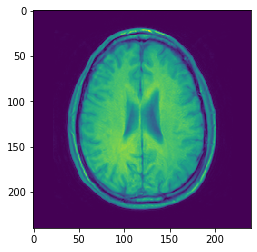

In [5]:
pic=Data_raw[:,:,20,0]
img = plt.imshow(pic)
#plt.rcParams['figure.dpi'] = plt.rcParamsDefault['figure.dpi']*2
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.figsize'] = (10, 10)
plt.show()

In [6]:
brain_mask = nib.load('/data/workgroup/SCI/SCI_CS_data/SCI_PAIN_C03/HEAD/analysis/brain_mask.nii.gz')
brain_mask = brain_mask.get_data()

/home/ltu/.conda/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


In [7]:
brain_mask = np.swapaxes(brain_mask,0,1)
brain_mask = np.flip(brain_mask,0)
#brain_mask = np.flip(brain_mask,1)

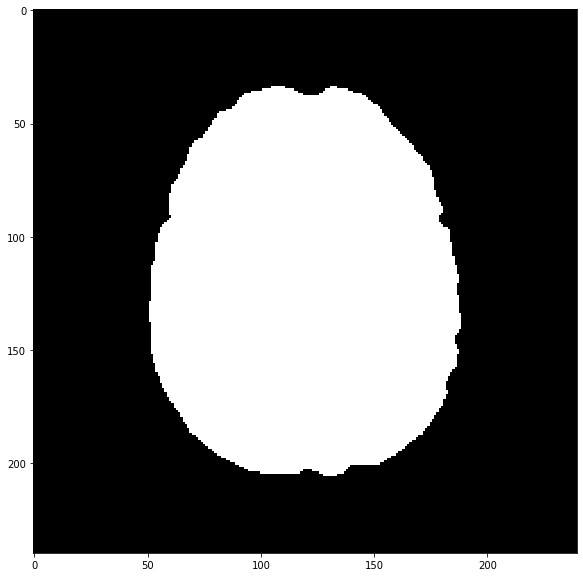

In [8]:
pic=brain_mask[:,:,20]
img = plt.imshow(pic)
#plt.rcParams['figure.dpi'] = plt.rcParamsDefault['figure.dpi']*2
#plt.rcParams['image.cmap'] = 'jet'
#plt.rcParams['figure.figsize'] = (10, 10)
plt.show()

In [9]:
#brain_mask=np.array(brain_mask)
#type(brain_mask)
brain_mask= brain_mask.astype(float)

In [35]:
brain_mask.shape

(240, 240, 40)

In [10]:
def data_masked_4D(data,mask):
    mask[mask==0]='nan'
    mask_4D=np.tile(np.stack((mask,mask),axis=-1),[1,1,1,16]) # create 4th dimension with size 32
    data_masked = data*mask_4D
    return data_masked

In [11]:
brain_data_masked=data_masked_4D(Data_raw,brain_mask)

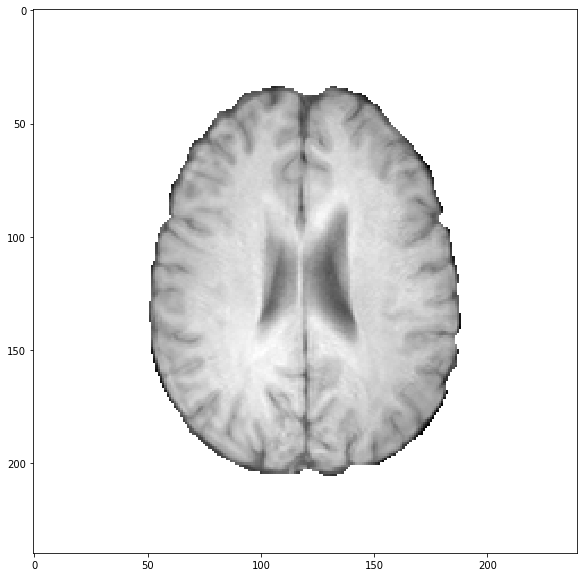

In [12]:
pic=brain_data_masked[:,:,20,0]
img = plt.imshow(pic)
#plt.rcParams['figure.dpi'] = plt.rcParamsDefault['figure.dpi']*2
#plt.rcParams['image.cmap'] = 'jet'
#plt.rcParams['figure.figsize'] = (10, 10)
plt.show()

In [13]:
def slice_decay_extraction(slice_num,data_masked):
    slice_data = data_masked[:,:,slice_num,:]
    slice_data_flat = slice_data.reshape(data_masked.shape[0]*data_masked.shape[1],32)
    slice_data_flat_strip = slice_data_flat[~np.isnan(slice_data_flat).any(axis=1)] # '~' is the logical_not operater
    return slice_data_flat_strip

In [14]:
def decay_extraction(data_masked):
    data_flat = data_masked.reshape(data_masked.shape[0]*data_masked.shape[1]*data_masked.shape[2],32)
    data_flat_strip = data_flat[~np.isnan(data_flat).any(axis=1)] # '~' is the logical_not operater
    return data_flat_strip

In [15]:
brain_data_processed=decay_extraction(brain_data_masked)
#np.random.shuffle(brain_data_processed) # shuffle the data to avoid regional bias

In [16]:
brain_data_processed.shape

(599140, 32)

In [17]:
brain_data_processed[10000]

array([495., 444., 377., 374., 336., 314., 298., 289., 268., 257., 247.,
       246., 231., 223., 215., 217., 219., 199., 211., 203., 199., 194.,
       192., 189., 185., 191., 187., 181., 179., 169., 186., 174.])

# labels

In [18]:
NNLS=sio.loadmat(file_name='../raw_data/C03_kevin_moremaps.mat')

In [19]:
NNLS['distributions']

array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        ...,

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan

In [20]:
labels = NNLS['distributions'][:,:,:,:]
#shape is (240, 240, 40, 40) but the last column is another view/angle of brain

In [21]:
labels.shape

(240, 240, 40, 40)

In [22]:
#MWF_NNLS_data=labels.get_data()
MWF_NNLS_data=np.nan_to_num(labels)
MWF_NNLS_data.shape

(240, 240, 40, 40)

In [23]:
#MWF_NNLS_data = np.swapaxes(MWF_NNLS_data,0,1)
#MWF_NNLS_data = np.flip(MWF_NNLS_data,0)
#MWF_NNLS_data = np.flip(MWF_NNLS_data,1)

In [24]:
MWF_NNLS_data.shape

(240, 240, 40, 40)

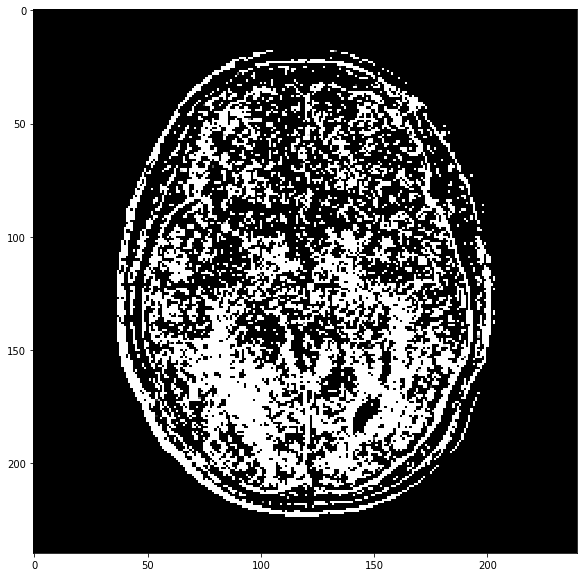

In [25]:
pic=MWF_NNLS_data[:,:,10,0]
img = plt.imshow(pic, vmin=0, vmax=0.5)
#plt.rcParams['figure.dpi'] = plt.rcParamsDefault['figure.dpi']*2
plt.rcParams['image.cmap'] = 'gray'
#plt.rcParams['figure.figsize'] = (10, 10)
plt.show()

In [26]:
brain_mask_nan = brain_mask
brain_mask_nan[brain_mask_nan==0]='nan'
brain_mask_nan = np.repeat(brain_mask_nan[:, :, :, np.newaxis], 40, axis=3)
MWF_NNLS_brain_masked=MWF_NNLS_data*brain_mask_nan

In [27]:
MWF_NNLS_brain_masked.shape

(240, 240, 40, 40)

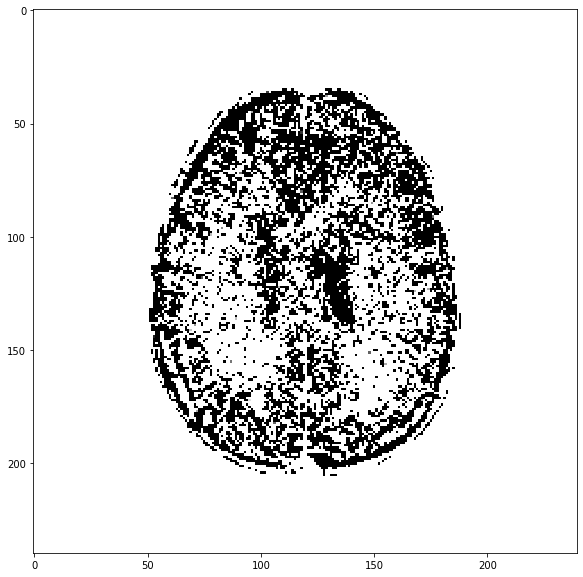

In [28]:
pic=MWF_NNLS_brain_masked[:,:,20,0]
img = plt.imshow(pic, vmin=0, vmax=0.5)
#plt.rcParams['figure.dpi'] = plt.rcParamsDefault['figure.dpi']*2
#plt.rcParams['image.cmap'] = 'jet'
#plt.rcParams['figure.figsize'] = (10, 10)
plt.show()

def MWF_slice_extraction(slice_num,data_masked):
    slice_data = data_masked[:,:,slice_num]
    slice_data_flat = slice_data.reshape(data_masked.shape[0]*data_masked.shape[1],40) # changed to 40 so have 40 outputs per voxel
    slice_data_flat_strip = slice_data_flat[~np.isnan(slice_data_flat).any(axis=1)] # '~' is the logical_not operater
    return slice_data_flat_strip

In [29]:
def MWF_extraction(data_masked):
    data_flat = data_masked.reshape(data_masked.shape[0]*data_masked.shape[1]*data_masked.shape[2],40) # changed to 40 so have 40 outputs per voxel
    data_flat_strip = data_flat[~np.isnan(data_flat).any(axis=1)] # '~' is the logical_not operater
    return data_flat_strip

In [30]:
print(MWF_NNLS_brain_masked.shape)
MWF_NNLS_brain_flat_strip = MWF_extraction(MWF_NNLS_brain_masked)
print(MWF_NNLS_brain_flat_strip.shape)
MWF_NNLS_brain_flat_strip

(240, 240, 40, 40)
(599140, 40)


array([[ 5.35088091,  6.19759512,  6.75569811, ..., 26.89413155,
        28.38493496, 29.73431813],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., 19.87266577,
        20.47310793, 21.01963757],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [31]:

# ASSUME CONCAT DATA THEN LABELS

#GET DEM DATA
print(MWF_NNLS_brain_flat_strip[:,:32].shape)
#GET DEM LABELS
print(MWF_NNLS_brain_flat_strip[:,32:].shape)

(599140, 32)
(599140, 8)


In [32]:
MWF_NNLS_brain_masked.shape

(240, 240, 40, 40)

In [33]:
brain_data_processed.shape

(599140, 32)

In [34]:
NNLS

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Oct 17 15:45:43 2018',
 '__version__': '1.0',
 '__globals__': [],
 'maps': array([[(array([[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],
 
        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],
 
        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan,